In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import xlwings as xw
%matplotlib inline

#한글 폰트
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

def KBpriceindex_preprocessing(path, data_type):
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range(1,1).end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    bignames = "서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경부 경남 제주도 6개광역시 5개광역시 수도권 기타지역 구분 전국"
    bigname_list = bignames.split(" ")
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]
        check = num
        
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])

    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num , raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')

        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                new_index.append('19'+temp[0]+'.'+temp[1])
            else:
                new_index.append(temp[0]+'.'+temp[1])

        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])      

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data = new_col_data.drop(('구분','구분'), axis=1)
    return cleaned_data

인허가 데이터 읽어와 데이터 프레임으로 정리

In [2]:
import pandas as pd

permission_path = r'데이터/주택건설인허가실적.xlsx'
permission_raw = pd.read_excel(permission_path, skiprows=10, index_col=0)

transpsed_permission = permission_raw.T

new_index = []

for old_date in transpsed_permission.index:
    temp_list = old_date.split(' ')
    new_index.append(temp_list[0][:4] + '.' + temp_list[1][:2])
    
transpsed_permission.index = pd.to_datetime(new_index)
transpsed_permission.columns.name = None

In [3]:
permission_raw

,2007년 01월,2007년 02월,2007년 03월,2007년 04월,2007년 05월,2007년 06월,2007년 07월,2007년 08월,2007년 09월,2007년 10월,...,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월
전국,12038,17751,20038,19186,30593,30830,45848,48461,55745,103817,...,39757,33368,100635,23978,37980,33648,31884,28279,33079,40178
서울,1530,794,1888,1963,1866,1893,7338,11719,13182,8146,...,2987,4275,6611,3417,5651,4617,4340,4124,3659,4425
부산,455,1099,2121,364,897,235,9678,6688,5079,6098,...,1383,2145,1830,256,394,1091,1194,717,4793,1360
대구,818,2731,1047,514,575,887,439,754,2305,75,...,3186,4148,5603,926,1222,2185,3206,824,3042,3217
인천,69,116,930,3337,211,5349,1207,1401,4464,8846,...,3732,1326,5208,1226,2764,457,368,1479,1945,1364
광주,1022,1178,1347,226,2071,139,1559,478,1117,2891,...,431,1526,6228,385,404,1195,1205,1439,760,1471
대전,55,34,65,81,511,427,54,51,46,3178,...,2391,2,1733,1440,926,2172,475,72,3198,1101
울산,183,1173,685,2281,244,1787,4248,1506,4007,1265,...,57,154,2380,2735,28,1023,73,47,683,74
세종,-,-,-,-,-,-,-,-,-,-,...,12,19,747,372,230,28,1024,69,37,21
경기,2647,2870,3188,3987,13168,7071,10964,15170,15969,54836,...,10821,10318,46706,7570,17801,11368,9423,10135,9651,15446


In [4]:
transpsed_permission

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-01-01,12038,1530,455,818,69,1022,55,183,-,2647,452,188,1004,888,206,698,1691,132
2007-02-01,17751,794,1099,2731,116,1178,34,1173,-,2870,190,305,1306,602,494,2244,2515,100
2007-03-01,20038,1888,2121,1047,930,1347,65,685,-,3188,389,694,1890,663,391,2314,2321,105
2007-04-01,19186,1963,364,514,3337,226,81,2281,-,3987,1154,464,701,474,1219,1224,1049,148
2007-05-01,30593,1866,897,575,211,2071,511,244,-,13168,513,680,3087,311,353,850,5178,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,33648,4617,1091,2185,457,1195,2172,1023,28,11368,1062,370,2668,555,2116,1065,929,747
2020-04-01,31884,4340,1194,3206,368,1205,475,73,1024,9423,1611,290,1014,1050,941,2010,3303,357
2020-05-01,28279,4124,717,824,1479,1439,72,47,69,10135,1834,326,2190,274,3354,486,511,398
2020-06-01,33079,3659,4793,3042,1945,760,3198,683,37,9651,1404,290,918,842,670,506,405,276


In [5]:
#인허가 데이터를 데이터프레임으로 변환하는 함수

def permission_preprocessing(path):
    permission_raw = pd.read_excel(permission_path, skiprows=10, index_col=0)

    transpsed_permission = permission_raw.T

    new_index = []

    for old_date in transpsed_permission.index:
        temp_list = old_date.split(' ')
        new_index.append(temp_list[0][:4] + '.' + temp_list[1][:2])

    transpsed_permission.index = pd.to_datetime(new_index)
    transpsed_permission.columns.name = None
    
    return transpsed_permission

In [6]:
permission_path = r'데이터/주택건설인허가실적.xlsx'
permission = permission_preprocessing(permission_path)
kb_path = r'데이터/★(월간)KB주택가격동향_시계열(2020.08).xlsx'
price_index = KBpriceindex_preprocessing(kb_path, '매매종합')
jun_index = KBpriceindex_preprocessing(kb_path, '전세종합')

매매가 지수와 인허가 데이터를 함꼐 그래프로 나타냄

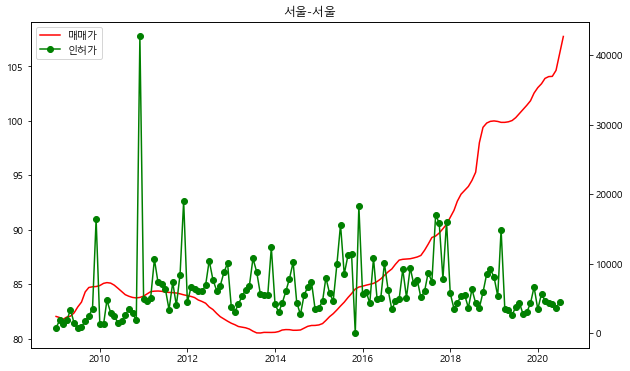

In [7]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)

ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가', color='red')
ln2 = ax2.plot(permission[si]['2009-1':], label='인허가', color='green',marker='o')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

plt.show()

In [8]:
#인허가 데이터 연도별
year_permission = permission.groupby(permission.index.year).sum()

In [9]:
year_permission

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007,555792,62842,41254,18174,41571,13088,11180,24507,198138,10677,19983,29317,11842,15255,24285,31503,2176
2008,371285,48417,13594,22880,33632,3945,14556,5897,115531,13235,10014,21657,12063,10849,15881,24375,4759
2009,381787,36090,6506,6645,59519,5024,1849,6728,159549,12312,11537,22860,11634,8984,13316,17119,2115
2010,386542,69190,18331,4724,37477,4487,4034,4904,143551,9312,8504,15331,12299,17599,13684,18234,4881
2011,549594,88060,37256,12462,35905,16059,19736,13146,148191,12989,18010,46794,16117,15576,16936,39339,13018
2012,586884,86123,42333,13012,32132,19584,6708,9751,151035,12156,24773,44450,24288,22222,25713,44760,10256
2013,440116,77621,29922,18078,18907,8454,5180,5344,96082,12964,19267,32343,13179,20061,23878,34683,6309
2014,515251,65249,17210,19079,13583,11056,5073,12502,163057,12977,16391,35564,13768,17628,41438,49424,8805
2015,765328,101235,33535,27118,30590,14673,7987,12459,276948,18868,31125,40311,22552,15631,53046,45325,18690
2016,726048,74739,36664,23169,22186,22796,13509,16325,244237,29489,29516,31800,28737,20983,36551,61124,21596


In [10]:
#인허가 데이터를 2년뒤로 옮기기

modified_permission = year_permission.shift(2)

temp = []

for year in modified_permission.index:
    temp.append(str(year) + '-6-1')
modified_permission.index = pd.to_datetime(temp)

modified_permission

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-01,555792.0,62842.0,41254.0,18174.0,41571.0,13088.0,11180.0,24507.0,198138.0,10677.0,19983.0,29317.0,11842.0,15255.0,24285.0,31503.0,2176.0
2010-06-01,371285.0,48417.0,13594.0,22880.0,33632.0,3945.0,14556.0,5897.0,115531.0,13235.0,10014.0,21657.0,12063.0,10849.0,15881.0,24375.0,4759.0
2011-06-01,381787.0,36090.0,6506.0,6645.0,59519.0,5024.0,1849.0,6728.0,159549.0,12312.0,11537.0,22860.0,11634.0,8984.0,13316.0,17119.0,2115.0
2012-06-01,386542.0,69190.0,18331.0,4724.0,37477.0,4487.0,4034.0,4904.0,143551.0,9312.0,8504.0,15331.0,12299.0,17599.0,13684.0,18234.0,4881.0
2013-06-01,549594.0,88060.0,37256.0,12462.0,35905.0,16059.0,19736.0,13146.0,148191.0,12989.0,18010.0,46794.0,16117.0,15576.0,16936.0,39339.0,13018.0
2014-06-01,586884.0,86123.0,42333.0,13012.0,32132.0,19584.0,6708.0,9751.0,151035.0,12156.0,24773.0,44450.0,24288.0,22222.0,25713.0,44760.0,10256.0
2015-06-01,440116.0,77621.0,29922.0,18078.0,18907.0,8454.0,5180.0,5344.0,96082.0,12964.0,19267.0,32343.0,13179.0,20061.0,23878.0,34683.0,6309.0
2016-06-01,515251.0,65249.0,17210.0,19079.0,13583.0,11056.0,5073.0,12502.0,163057.0,12977.0,16391.0,35564.0,13768.0,17628.0,41438.0,49424.0,8805.0


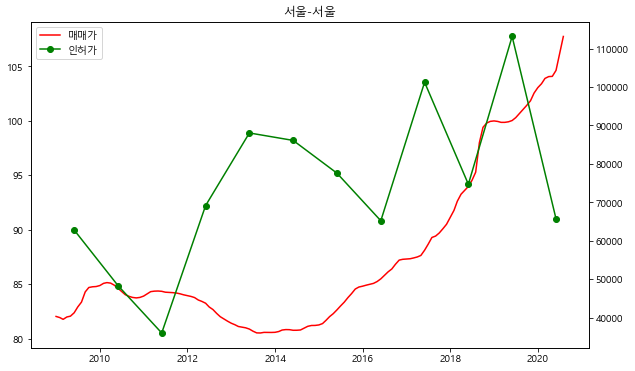

In [11]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)

ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가', color='red')
ln2 = ax2.plot(modified_permission[si]['2009':], label='인허가', color='green',marker='o')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

plt.show()

전세가 지수 데이터를 추가해서 그래프로 나타내기

C:\Users\mrhi6\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mrhi6\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


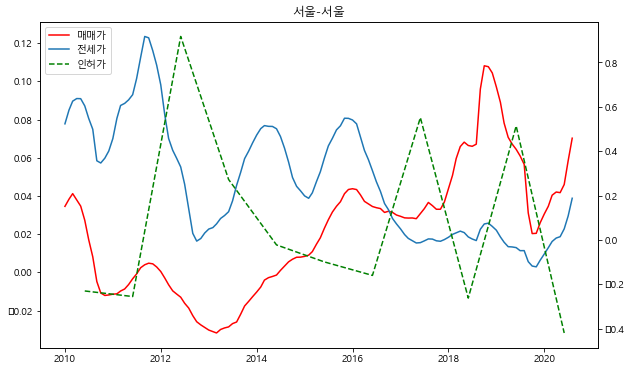

In [12]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)

ln1 = ax.plot(price_index[si][gu]['2009-1':].pct_change(12), label='매매가', color='red')
ln2 = ax.plot(jun_index[si][gu]['2009-1':].pct_change(12), label='전세가')
ln3 = ax2.plot(modified_permission[si]['2009':].pct_change(), label='인허가', color='green', ls='--')
lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

plt.show()

In [13]:
from datetime import datetime
from dateutil.relativedelta import relativedelta


def demand(price_index, jeonse_index, index_date, time_range):

    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date])/price_index.loc[prev_date]
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date]) / jeonse_index.loc[prev_date]
    #4% 절대치 감소한 값 구하기
    demand_df['매매증감률*0.96'] = (price_index.loc[index_date] - price_index.loc[prev_date])/price_index.loc[prev_date]*0.96
    demand_df['전세증감률*0.96'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date]) / jeonse_index.loc[prev_date]*0.96

    #demand_df 에 지난 최대값과 기준날짜 값의 최대값 대비 증감률 저장

    demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값'])/demand_df['이전최대값']
    
    demand_df['이전최대값*0.96'] = price_index[prev_date2:index_date][:-1].max()*0.96
    demand_df['최댓값대비증감률*0.96'] = (price_index.loc[index_date] - demand_df['이전최대값*0.96'])/demand_df['이전최대값*0.96']
    
    demand_df['최댓값대비증감률*0.96'] > 0

    demand_df['최댓값대비상승*0.96'] = demand_df['최댓값대비증감률*0.96'] > 0
    
    #매매가 지수와 전세가 지수의 상승여보를 계산해 demand_df 에 저장
    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    
    
    demand_df['빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0

    demand_df['빠른전세상승*0.96'] = demand_df['전세증감률*0.96'] > demand_df['매매증감률*0.96']
    demand_df['최댓값대비상승*0.96'] = demand_df['최댓값대비증감률*0.96'] > 0
    demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','빠른전세상승','최댓값대비상승','최댓값대비상승*0.96']].sum(axis=1)

    demand_df[demand_df['수요총합'] == 4]

    
    seleted_index = []

    for name in demand_df.index:
        if name[0] is not name[1]:
            seleted_index.append((name[0], name[1]))

    demand_df = demand_df.loc[seleted_index]
    
    return demand_df

In [17]:
index_date = datetime(2013, 1, 1)
time_range = 12
demand_1 = demand(price_index, jun_index, index_date, time_range)
demand_1

매매증감률       전세증감률  매매증감률*0.96  전세증감률*0.96       이전최대값  \
서울  강북    -0.0240769   0.0184209  -0.0231138    0.017684   86.641460   
    강북구   -0.0237712   0.0189926  -0.0228204   0.0182329   94.840363   
    광진구  -0.00883725   0.0364661 -0.00848376   0.0350075   88.429683   
    노원구   -0.0474198 -0.00412447   -0.045523 -0.00395949   89.133518   
    도봉구   -0.0388257   0.0176781  -0.0372726    0.016971   89.921492   
...              ...         ...         ...         ...         ...   
경남  진주    0.00675289   0.0151544  0.00648278   0.0145482   96.416297   
    김해    -0.0300821   0.0035269  -0.0288788  0.00338583  100.979669   
    통영           NaN         NaN         NaN         NaN         NaN   
제주도 서귀포    0.0244632    0.014421   0.0234846   0.0138441   82.700497   
    기타지방   0.0271613   0.0541371   0.0260748   0.0519717   96.035155   

             최댓값대비증감률  이전최대값*0.96 최댓값대비증감률*0.96  최댓값대비상승*0.96  매매가상승  전세가상승  \
서울  강북     -0.0385808   83.175802    0.00147838          True  False   True   
    강북구    -0.0480823   91.046749   -0.00841905         False  False   True   
    광진구    -0.0126498   84.892496     0.0284898          True  False   True   
    노원구    -0.0999133   85.568177    -0.0624096         False  False  False   
    도봉구     -0.075768   86.324632    -0.0372583         False  False   True   
...               ...         ...           ...           ...    ...    ...   
경남  진주     0.00105241   92.559645     0.0427629          True  False   True   
    김해     -0.0335894   96.940482    0.00667772          True  False  False   
    통영            NaN         NaN           NaN         False  False  False   
제주도 서귀포    0.00148503   79.392477     0.0432136          True   True   True   
    기타지방  0.000953492   92.193749     0.0426599          True   True   True   

          빠른전세상승  최댓값대비상승  빠른전세상승*0.96  수요총합  
서울  강북      True    False         True     3  
    강북구     True    False         True     2  
    광진구     True    False         True     3  
    노원구     True    False         True     1  
    도봉구     True    False         True     2  
...          ...      ...          ...   ...  
경남  진주      True     True         True     4  
    김해      True    False         True     2  
    통영     False    False        False     0  
제주도 서귀포    False     True        False     4  
    기타지방    True     True         True     5  

[167 rows x 15 columns]

KeyError: '5개광역시\n(인천外)'

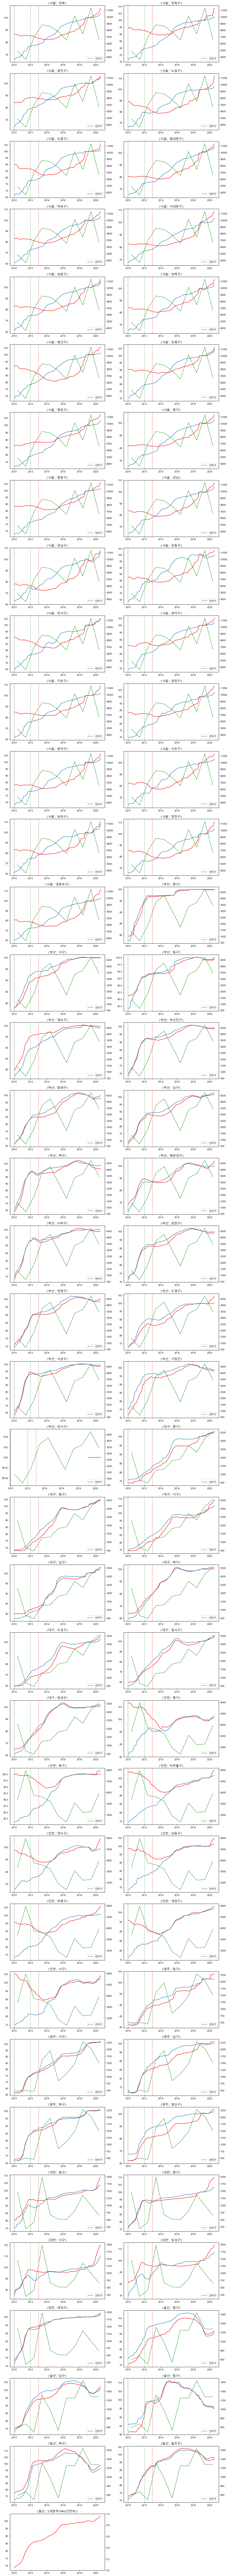

In [19]:
prev_date = index_date - relativedelta(months=time_range)
prev_date2 = index_date - relativedelta(months=time_range*3)
graph_start = index_date - relativedelta(months=time_range*3)
graph_end = index_date + relativedelta(months=time_range*3)

num_row = int((len(demand_1.index)-1)/2)+1

plt.figure(figsize=(15, num_row*5))

for i, spot in enumerate(demand_1.index):
    ax = plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    ax2 = ax.twinx()
    si = spot[0]
    gu = spot[1]
    
    ln1 = ax.plot(price_index[si][gu][graph_start:], label='매매가', color='red')
    ln2 = ax.plot(jun_index[si][gu][graph_start:], label='전세가')
    ln3 = ax2.plot(modified_permission[si][graph_start:]/10, label='인허가', color='green', ls='--')

    plt.axvline(x=index_date, color='lightcoral', linestyle='--')
    plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    plt.axvline(x=prev_date2, color='darkseagreen', linestyle='-')
    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    plt.legend(loc = "lower right")

plt.show()